# Plots for data section 
The following plots will be presented: 
- Number of individuals by gender
- Number of individuals by socio-economic level by attribute STRATUM
- Number of individuals by gender&socio-economic level


- Distribution of grades by gender (before and after college)
- Distribution of grades by socio-economic-level (before and after college)
- Distribution of grades by gender&socio-economic level (before and after college)


- Matrix showing the Pearson correlation between grades (before), grades (after), gender, socio-economic level
- Scatter-plot showing the correlation between grades before vs after college. 

In [82]:
# Loading data and packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import stats

def setup_mpl():
    mpl.rcParams["font.family"] = "Helvetica Neue"
    mpl.rcParams["font.size"] = 11
    # mpl.rcParams["figure.figsize"] = (7,4)
    mpl.rcParams["figure.dpi"] = 200
setup_mpl()

df = pd.read_csv("dropped_col_df.csv")
df = df[df.STRATUM!='0']

## Number of individuals by gender

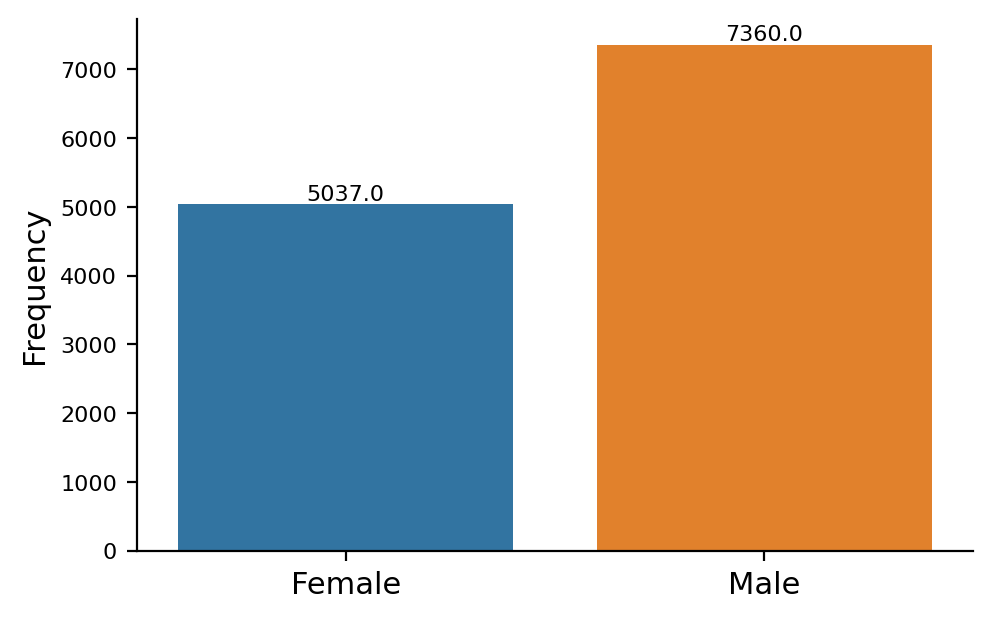

In [83]:
g = sns.catplot(x='GENDER', data=df, kind='count', legend=True)
g.fig.set_size_inches(5, 3)

# extract the matplotlib axes_subplot objects from the FacetGrid
ax = g.facet_axis(0, 0)

# iterate through the axes containers
for c in ax.containers:
    labels = [f'{(v.get_height()):.1f}' for v in c]

    ax.bar_label(c, labels=labels, label_type='edge', fontsize=8)
ax.set_xlabel('', fontdict=None, labelpad=None)
ax.set_ylabel('Frequency', fontdict=None, labelpad=None)
ax.set_xticklabels(['Female','Male'])
ax.xaxis.set_tick_params(labelsize=11)
ax.yaxis.set_tick_params(labelsize=8)

## Number of individuals by socio-economic level by attribute STRATUM

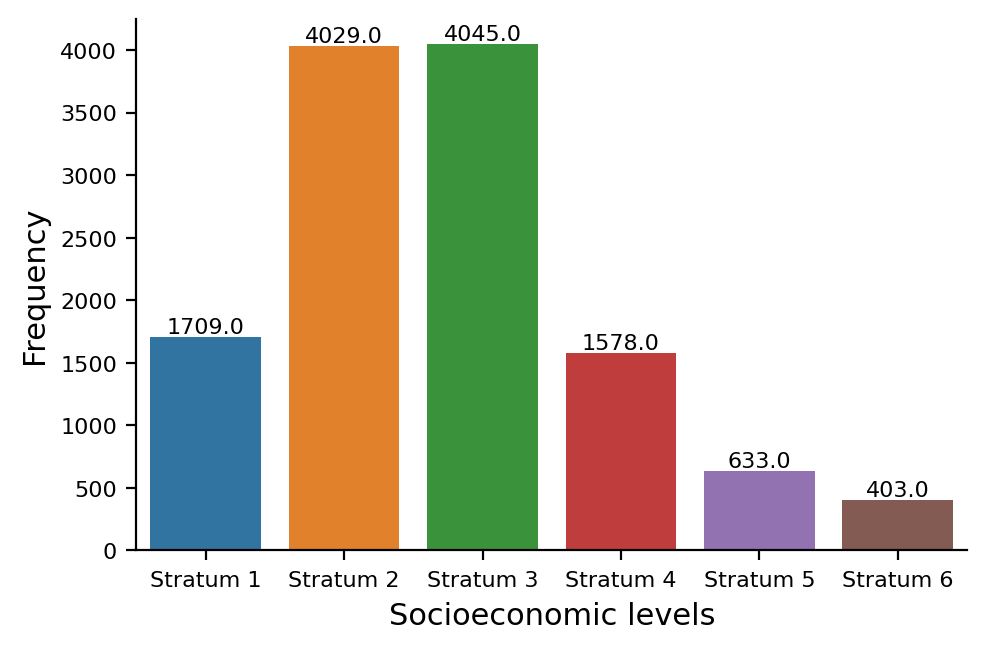

In [84]:
g = sns.catplot(x="STRATUM", kind="count",   data=df, legend=True, order=['Stratum 1','Stratum 2','Stratum 3','Stratum 4','Stratum 5','Stratum 6'])
g.fig.set_size_inches(5, 3)

# extract the matplotlib axes_subplot objects from the FacetGrid
ax = g.facet_axis(0, 0)

# iterate through the axes containers
for c in ax.containers:
    labels = [f'{(v.get_height()):.1f}' for v in c]

    ax.bar_label(c, labels=labels, label_type='edge', fontsize=8)
ax.set_xlabel('Socioeconomic levels', fontdict=None, labelpad=None)
ax.set_ylabel('Frequency', fontdict=None, labelpad=None)
ax.xaxis.set_tick_params(labelsize=8)
ax.yaxis.set_tick_params(labelsize=8)



C:\Users\bayka\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)
C:\Users\bayka\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:64: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  self.fig.tight_layout(*args, **kwargs)
C:\Users\bayka\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:64: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  self.fig.tight_layout(*args, **kwargs)
C:\Users\bayka\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate 

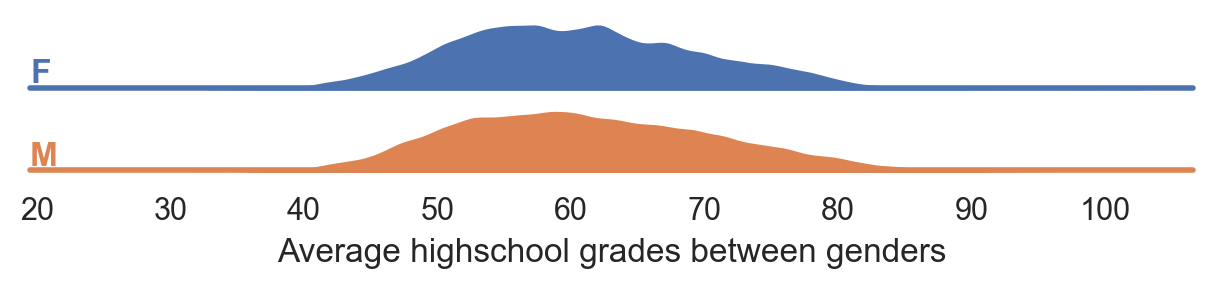

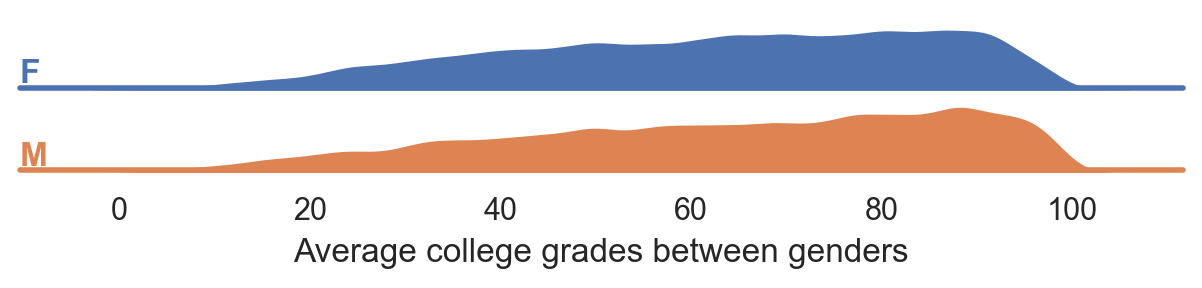

In [97]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

df = pd.read_csv("df_sum_score.csv")

def Ridgeline_dists(df,x, metric="",plot_label=""):
    df_temp = df.copy()
    x = x 
    g = df_temp.GENDER
    df_kat = pd.DataFrame(dict(x=x, g=g))
    df_kat_order = df_kat.groupby(["g"]).count()
    df_kat_order = df_kat_order.sort_values(by="x", ascending=False)

    # Initialize the FacetGrid object
    pal = sns.cubehelix_palette(10, rot=-0.25, light=0.7)
    g = sns.FacetGrid(
        df_kat,
        row="g",
        hue="g",
        aspect=15,
        height=0.5,
        # palette=pal # Denne gør den i de 2 blå farver
    )

    # Draw the densities in a few steps
    g.map(sns.kdeplot, "x", bw_adjust=0.5, clip_on=False, fill=True, alpha=1, linewidth=1.5)
    g.map(sns.kdeplot, "x", clip_on=False, color="w", lw=2, bw_adjust=0.5)
    g.map(plt.axhline, y=0, lw=2, clip_on=False)

    # Define and use a simple function to label the plot in axes coordinates
    def label(x, color, label):
        ax = plt.gca()
        ax.text(
            0,
            0.2,
            label,
            fontweight="bold",
            color=color,
            ha="left",
            va="center",
            transform=ax.transAxes
        )

    g.map(label, "x")

    g.set_xlabels(plot_label)

    # Set the subplots to overlap
    g.fig.subplots_adjust(hspace=-0.25)

    # Remove axes details that don't play well with overlap
    g.set_titles("")
    g.set(yticks=[])
    g.despine(bottom=True, left=True)
    

Ridgeline_dists(df,x=df.HI_GRADE_AVG,plot_label='Average highschool grades between genders')
Ridgeline_dists(df,x=df.COL_GRADE_AVG,plot_label='Average college grades between genders')


In [99]:
df

5129     100.000000
11864     97.666667
4874      96.666667
7340      96.666667
1089      95.000000
            ...    
3588      33.666667
3741      32.333333
1157      32.000000
3015      30.333333
2012      26.000000
Name: HI_GRADE_AVG, Length: 12411, dtype: float64

In [100]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(style='ticks')

df = pd.read_csv("df_sum_score.csv")
df = df.HI_GRADE_AVG.sort_values(ascending=False, inplace=False, kind='quicksort')


women = df[df.GENDER=='F'][['GENDER','HI_GRADE_AVG']]
bins = np.linspace(min(women.HI_GRADE_AVG),max(women.HI_GRADE_AVG), 100)

histwomen, edges = np.histogram(women.HI_GRADE_AVG, bins=bins, density=True)
x = (edges[1:]+edges[:-1])/2
width=bins[1]-bins[0]
fig,ax = plt.subplots()
ax.bar(x,histwomen,width=width*0.9)
ax.set_xlabel('women')

men = df[df.GENDER=='M'][['GENDER','HI_GRADE_AVG']]
bins = np.linspace(min(men.HI_GRADE_AVG),max(men.HI_GRADE_AVG), 100)

histmen, edges = np.histogram(men.HI_GRADE_AVG, bins=bins, density=True)
x = (edges[1:]+edges[:-1])/2
width=bins[1]-bins[0]
fig,ax = plt.subplots()
ax.bar(x,histmen,width=width*0.9)
ax.set_xlabel('men')



# parameterise our distributions
# d1 = sps.norm(0, 10)
d1 = sps.norm(women.HI_GRADE_AVG.mean(),women.HI_GRADE_AVG.std())
d2 = sps.norm(men.HI_GRADE_AVG.mean(),men.HI_GRADE_AVG.std())

# sample values from above distributions
y1 = d1.rvs(300)
y2 = d2.rvs(300)
# combine mixture
ys = np.concatenate([y1, y2])

# create new figure with size given explicitly
plt.figure(figsize=(10, 6))

# add histogram showing individual components
plt.hist([y1, y2], 31, histtype='barstacked', density=True, alpha=0.4, edgecolor='none')

# get X limits and fix them
mn, mx = plt.xlim()
plt.xlim(mn, mx)

# add our distributions to figure
x = np.linspace(mn, mx, 301)
plt.plot(x, d1.pdf(x) * (len(y1) / len(ys)), color='C0', ls='--', label='Women')
plt.plot(x, d2.pdf(x) * (len(y2) / len(ys)), color='C1', ls='--', label='Men')

# estimate Kernel Density and plot
kde = sps.gaussian_kde(ys)
plt.plot(x, kde.pdf(x), label='Cummulative distribution')

# finish up
plt.legend()
plt.ylabel('Probability density')
sns.despine()

AttributeError: 'Series' object has no attribute 'GENDER'